In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

In [2]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [3]:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [4]:
data, target = diabetes["data"], diabetes["target"]

In [5]:
data[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [6]:
target[0]

151.0

In [7]:
# Data EDA
df = pd.DataFrame(data, columns=diabetes["feature_names"])

In [8]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [9]:
# Data split

In [10]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.3)

In [11]:
len(data), len(train_data), len(test_data)

(442, 309, 133)

In [12]:
print("train ratio : {:.2f}".format(len(train_data)/len(data)))
print("test ratio : {:.2f}".format(len(test_data)/len(data)))

train ratio : 0.70
test ratio : 0.30


In [13]:
# Multivariate Regression

In [14]:
from sklearn.linear_model import LinearRegression

multi_regressor = LinearRegression()
multi_regressor.fit(train_data, train_target)

LinearRegression()

In [15]:
multi_regressor.intercept_

147.71524417759434

In [16]:
multi_regressor.coef_

array([  15.28529701, -218.59128442,  545.19999487,  263.6592052 ,
       -582.66349612,  317.33684049,   48.53542723,  215.51374612,
        655.7965519 ,   64.04030953])

In [17]:
multi_train_pred = multi_regressor.predict(train_data)
multi_test_pred = multi_regressor.predict(test_data)

In [19]:
from sklearn.metrics import mean_squared_error

multi_train_mse = mean_squared_error(multi_train_pred, train_target)
multi_test_mse = mean_squared_error(multi_test_pred, test_target)

In [20]:
print(f"Multi Regression Train MSE is {multi_train_mse:.4f}")
print(f"Multi Regression Test MSE is {multi_test_mse:.4f}")

Multi Regression Train MSE is  3034.2623
Multi Regression Test MSE is  2562.2750


In [21]:
# Ridge Regression

In [22]:
from sklearn.linear_model import Ridge

ridge_regressor = Ridge()
ridge_regressor.fit(train_data, train_target)

Ridge()

In [23]:
ridge_regressor.intercept_

147.74060119766182

In [24]:
ridge_regressor.coef_

array([  46.89201977,  -55.64009506,  270.71747699,  158.68867814,
         23.59440223,  -11.13019705, -130.05870493,  122.00237806,
        225.92117758,  107.08728777])

In [28]:
ridge_train_pred = ridge_regressor.predict(train_data)
ridge_test_pred = ridge_regressor.predict(test_data)

In [29]:
ridge_train_mse =  mean_squared_error(ridge_train_pred, train_target)
ridge_test_mse = mean_squared_error(ridge_test_pred, test_target)

In [30]:
print(f"Ridge Regression Train MSE is {ridge_train_mse:.4f}")
print(f"Ridge Regression Test MSE is {ridge_test_mse:.4f}")

Ridge Regression Train MSE is 3556.1983
Ridge Regression Test MSE is 3200.4051


In [31]:
# LASSO Regression

In [33]:
from sklearn.linear_model import Lasso

lasso_regressor = Lasso()
lasso_regressor.fit(train_data, train_target)

Lasso()

In [34]:
lasso_regressor.intercept_

148.13825690433762

In [35]:
lasso_regressor.coef_

array([  0.        ,   0.        , 377.69541767,   0.        ,
         0.        ,   0.        ,  -0.        ,   0.        ,
       316.05550058,   0.        ])

In [38]:
np.array(diabetes["feature_names"])[lasso_regressor.coef_ != 0]

array(['bmi', 's5'], dtype='<U3')

In [39]:
lasso_train_pred = lasso_regressor.predict(train_data)
lasso_test_pred = lasso_regressor.predict(test_data)

In [40]:
lasso_train_mse = mean_squared_error(lasso_train_pred, train_target)
lasso_test_mse = mean_squared_error(lasso_test_pred, test_target)

In [41]:
print(f"LASSO Regression Train MSE is {lasso_train_mse:.4f}")
print(f"LASSO Regression Test MSE is {lasso_test_mse:.4f}")

LASSO Regression Train MSE is 3897.9528
LASSO Regression Test MSE is 3581.6843


In [43]:
# 비교
print(f"Multi Regression Test MSE is {multi_test_mse:.4f}")
print(f"Ridge Regression Test MSE is {ridge_test_mse:.4f}")
print(f"LASSO Regression Test MSE is {lasso_test_mse:.4f}")

Multi Regression Test MSE is 2562.2750
Ridge Regression Test MSE is 3200.4051
LASSO Regression Test MSE is 3581.6843


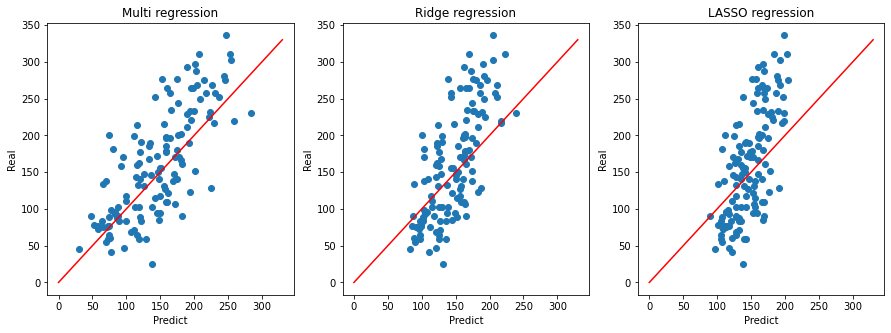

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
preds = [
    ("Multi regression", multi_test_pred),
    ("Ridge regression", ridge_test_pred),
    ("LASSO regression", lasso_test_pred)
]

for idx, (name, test_pred) in enumerate(preds):
    ax = axes[idx]
    ax.scatter(test_pred, test_target)
    ax.plot(np.linspace(0, 330, 100), np.linspace(0, 330, 100), color="red")
    ax.set_xlabel("Predict")
    ax.set_ylabel("Real")
    ax.set_title(name)